In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

work_dir = '/Users/bykau/Dropbox/Fuzzy/'

synthetic_accuracy = pd.read_csv(work_dir+'synthetic_accuracy.csv', index_col='confusion probability')
synthetic_convergence = pd.read_csv(work_dir+'synthetic_convergence.csv', index_col='number of iterations')
synthetic_values = pd.read_csv(work_dir+'synthetic_values.csv', index_col='number of distinct values per object')

flight_accuracy = pd.read_csv(work_dir+'flight_accuracy.csv', index_col='confusion probability')
flight_efficiency = pd.read_csv(work_dir+'flight_efficiency.csv', index_col='number of objects with confusions')

face_accuracy = pd.read_csv(work_dir+'face_accuracy.csv')

# Synthetic Data Experiments

Vary the confusion probability in synthetic data.


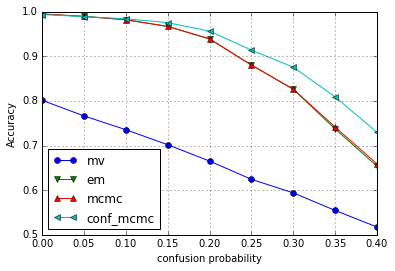

In [4]:
print("Vary the confusion probability in synthetic data.")
errs = synthetic_accuracy[['mv std', 'em std', 'mcmc std', 'f_mcmc std']].rename(columns={"mv std": "mv",
                                                                                         'em std': 'em',
                                                                                         'mcmc std': 'mcmc',
                                                                                         'f_mcmc std': 'f_mcmc'})
ax = synthetic_accuracy[['mv', 'em', 'mcmc', 'conf_mcmc']].plot(linestyle='-',
                                                             style=['o', 'v', '^', '<'],
                                                             grid='on')
ax.set_ylabel('Accuracy')
fig = ax.get_figure()
fig.savefig(work_dir+'synth_accuracy.pdf')

Convergence of MCMC.


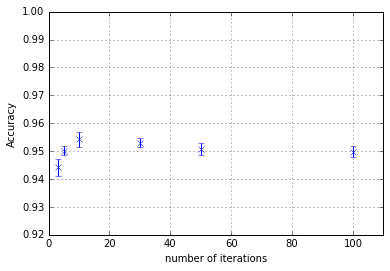

In [18]:
print("Convergence of MCMC.")
ax = synthetic_convergence.plot(marker='x',
                                linestyle='',
                                yerr=synthetic_convergence.error.values,
                                xlim=[0, 110],
                                ylim=[0.92, 1],
                                grid='on',
                                legend=False)
ax.set_ylabel('Accuracy')
fig = ax.get_figure()
fig.savefig(work_dir+'synth_convergence.pdf')

Number of distinct values per object


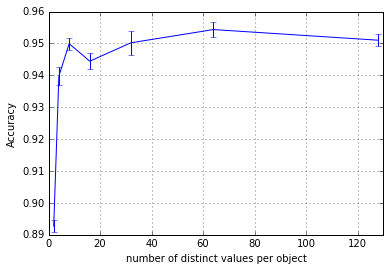

In [38]:
print("Number of distinct values per object")
errs = [x[0] for x in synthetic_values[['std']].values]
ax = synthetic_values[['accuracy']].plot(grid='on', yerr=errs, xlim=[0, 130], legend=False)
ax.set_ylabel('Accuracy')

fig = ax.get_figure()
fig.savefig(work_dir+'synth_values.pdf')

# Real Data Experiments

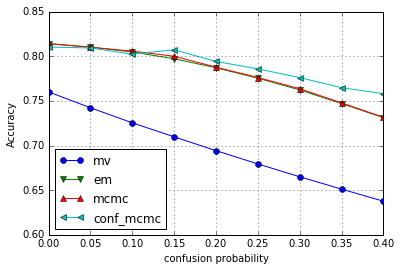

In [9]:
errs = flight_accuracy[['mv_std', 'em_std', 'mcmc_std', 'f_mcmc_std']].rename(columns={"mv_std": "mv",
                                                                                         'em_std': 'em',
                                                                                         'mcmc_std': 'mcmc',
                                                                                         'f_mcmc_std': 'f_mcmc'})
ax = flight_accuracy[['mv', 'em', 'mcmc', 'conf_mcmc']].plot(linestyle='-',
                                                          style=['o', 'v', '^', '<'],
                                                          grid='on')
ax.set_ylabel('Accuracy')

fig = ax.get_figure()
fig.savefig(work_dir+'flight_accuracy.pdf')

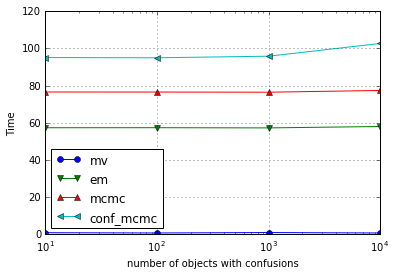

In [11]:
ax = flight_efficiency[['mv', 'em', 'mcmc', 'conf_mcmc']].plot(linestyle='-',
                                                          style=['o', 'v', '^', '<'],
                                                          grid='on', logx=True)
ax.set_ylabel('Time')

fig = ax.get_figure()
fig.savefig(work_dir+'flight_efficiency.pdf')

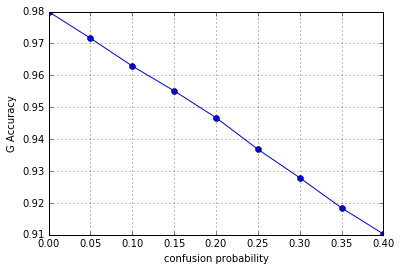

In [13]:
ax = flight_accuracy.G.plot(linestyle='-', style=['o'], grid='on')
ax.set_ylabel('G Accuracy')

fig = ax.get_figure()
fig.savefig(work_dir+'flight_G.pdf')

# Faces Experiment

In [2]:
face_accuracy

,accuracy,methods,std
0,0.715926,mv,1.110223e-16
1,0.746667,em,2.931312e-02
2,0.746667,mcmc,2.931312e-02
3,0.762222,f_mcmc,2.287918e-02
